In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
# Data Load
df = pd.read_csv('D:/Denoising/Autoencoder/LSTM_SAE/Samsung.txt', sep = ',')

In [ ]:
# 보조지표 : SMA, EMA, Stochastic K%, Stochastic D%, RSI, MACD, Disparity



In [ ]:
# Close Up and Down Labeling


In [ ]:
# Slide Window

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

In [ ]:
# Model Build

In [ ]:
# Prediction
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [8]:
data_dmatrix

In [ ]:
data_dmatrix

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

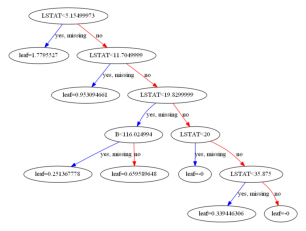

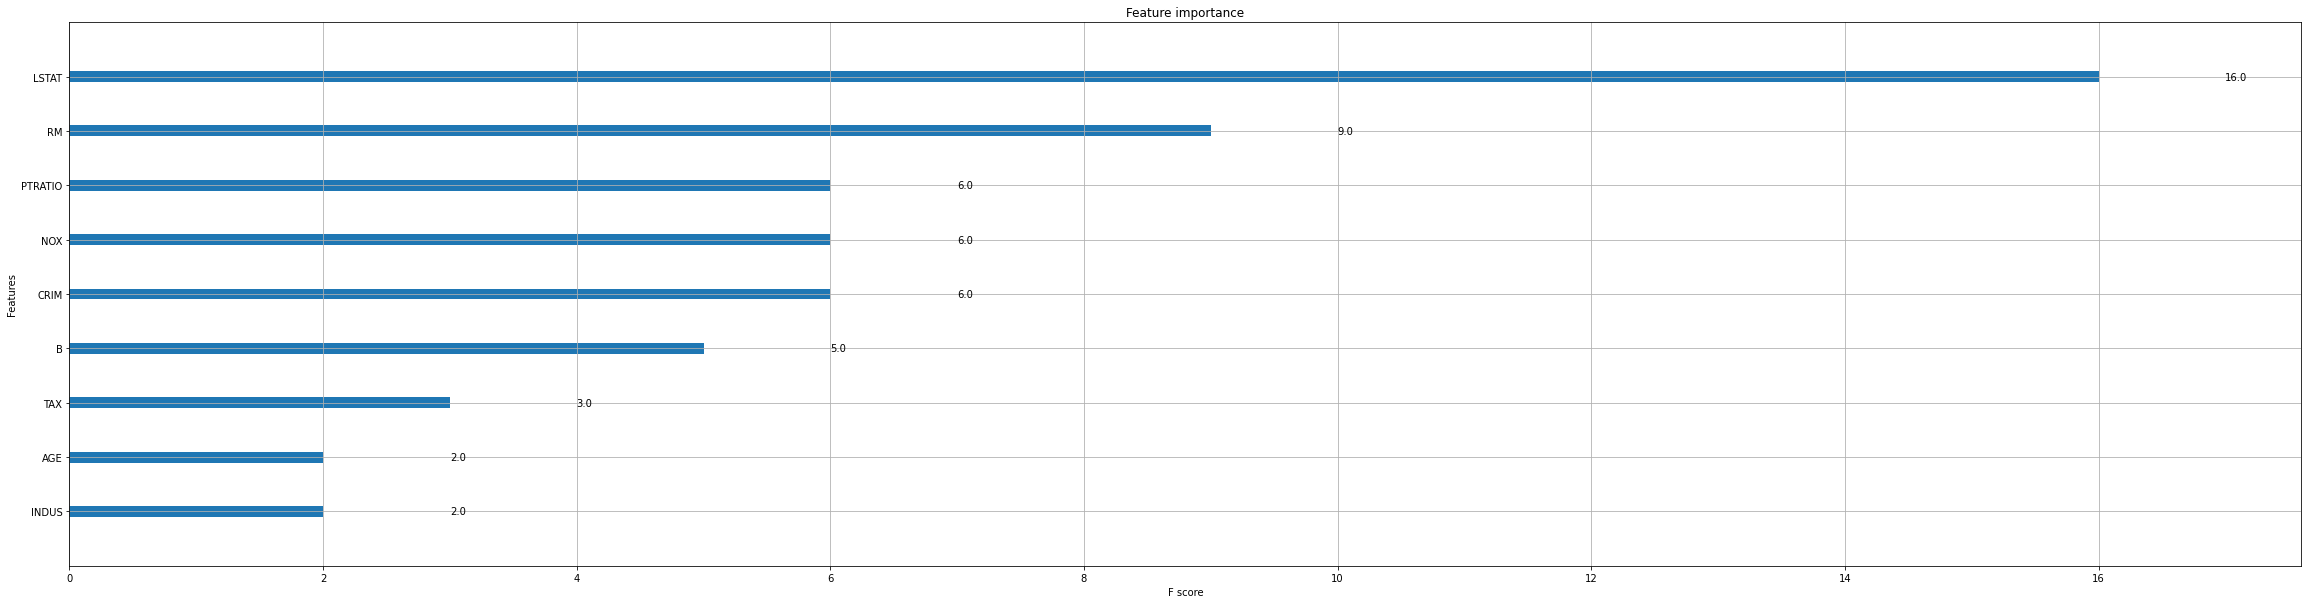

In [5]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()
data['PRICE'] = boston.target

X, y = data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)







params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 10]
plt.show()